<a href="https://colab.research.google.com/github/ArthurCBx/Introduction_to_Data_Science_Coursera/blob/main/More_Data_Processing_With_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Merging DataFrames

In [ ]:
import pandas as pd

staff_df = pd.DataFrame([{'Name': 'Kelly', 'Role': 'Director of HR'},
                         {'Name': 'Sally', 'Role': 'Course liasion'},
                         {'Name': 'James', 'Role': 'Grader'}])
staff_df = staff_df.set_index('Name')

student_df = pd.DataFrame([{'Name': 'James', 'School': 'Business'},
                          {'Name': 'Mike', 'School': 'Law'},
                          {'Name': 'Sally', 'School': 'Engineering'}])
student_df = student_df.set_index('Name')

print(staff_df.head())
print()
print(student_df.head())


                 Role
Name                 
Kelly  Director of HR
Sally  Course liasion
James          Grader

            School
Name              
James     Business
Mike           Law
Sally  Engineering


In [5]:
!git clone https://github.com/ArthurCBx/Introduction_to_Data_Science_Coursera.git

Cloning into 'Introduction_to_Data_Science_Coursera'...
remote: Enumerating objects: 84, done.
remote: Counting objects: 100% (84/84), done.
remote: Compressing objects: 100% (70/70), done.
remote: Total 84 (delta 17), reused 67 (delta 9), pack-reused 0 (from 0)
Receiving objects: 100% (84/84), 4.54 MiB | 4.81 MiB/s, done.
Resolving deltas: 100% (17/17), done.
Filtering content: 100% (20/20), 1.26 GiB | 47.79 MiB/s, done.


Notice that there is some overlap in these DF. James and Sally are both sutdents and staff, but Mike and Kelly are not

In [ ]:
# If we want their union, we can call the merge() function and tell it we want an outer join
# We want the left and right indices as the joining columns
pd.merge(staff_df, student_df, how='outer', left_index=True, right_index=True)

,Role,School
Name,,
James,Grader,Business
Kelly,Director of HR,NaN
Mike,NaN,Law
Sally,Course liasion,Engineering


In [ ]:
# If want their intersection, we can call merge() function and tell it inner
pd.merge(staff_df, student_df, how='inner', left_index=True, right_index=True)

,Role,School
Name,,
Sally,Course liasion,Engineering
James,Grader,Business


In [ ]:
# If we want ti get a kust if akk staff regardless of whether they were students or not.
# But if the were students, we would wnat to get their student details as well.
# The order of df's is important in this call

pd.merge(staff_df, student_df, how='left', left_index=True, right_index=True)

,Role,School
Name,,
Kelly,Director of HR,NaN
Sally,Course liasion,Engineering
James,Grader,Business


In [ ]:
# To get a list of all students and their role if they have one
pd.merge(staff_df, student_df, how='right', left_index=True, right_index=True)

,Role,School
Name,,
James,Grader,Business
Mike,NaN,Law
Sally,Course liasion,Engineering


In [ ]:
# We can also join by column.
# In the example below, we can assign a column that both dataframe has as the joining columnn using the parameter "on"

staff_df = staff_df.reset_index()
student_df = student_df.reset_index()
pd.merge(staff_df, student_df, how='right', on='Name')

,Name,Role,School
0,James,Grader,Business
1,Mike,NaN,Law
2,Sally,Course liasion,Engineering


In [ ]:
# What happens when we have conflicts between dataframes?

staff_df = pd.DataFrame([{'Name': 'Kelly', 'Role': 'Director of HR',
                          'Location': 'State Street'},
                         {'Name': 'Sally', 'Role': 'Course liasion',
                          'Location': 'Washington Avenue'},
                         {'Name': 'James', 'Role': 'Grader',
                          'Location': 'Washington Avenue'}])
student_df = pd.DataFrame([{'Name': 'James', 'School': 'Business',
                            'Location': '1024 Billiard Avenue'},
                           {'Name': 'Mike', 'School': 'Law',
                            'Location': 'Fraternity House #22'},
                           {'Name': 'Sally', 'School': 'Engineering',
                            'Location': '512 Wilson Crescent'}])

# The merge function preserves this information, but appends an _x or _y to help differentiate between which
# index went with which column of data. The _x is always the left DataFrame information, and the _y is always
# the right DataFrame information.

# Here, if we want all the staff information regardless of whether they were students or not. But if they were
# students, we would want to get their student details as well.Then we can do a left join and on the column of
# Name

pd.merge(staff_df, student_df, how='left', on='Name')

,Name,Role,Location_x,School,Location_y
0,Kelly,Director of HR,State Street,NaN,NaN
1,Sally,Course liasion,Washington Avenue,Engineering,512 Wilson Crescent
2,James,Grader,Washington Avenue,Business,1024 Billiard Avenue


In [ ]:
# When talking about multi-indexing and multiple columns, the first name might overlap but the last name don't
# We can pass multiple parameters as the join keys

staff_df = pd.DataFrame([{'First Name': 'Kelly', 'Last Name': 'Desjardins',
                          'Role': 'Director of HR'},
                         {'First Name': 'Sally', 'Last Name': 'Brooks',
                          'Role': 'Course liasion'},
                         {'First Name': 'James', 'Last Name': 'Wilde',
                          'Role': 'Grader'}])
student_df = pd.DataFrame([{'First Name': 'James', 'Last Name': 'Hammond',
                            'School': 'Business'},
                           {'First Name': 'Mike', 'Last Name': 'Smith',
                            'School': 'Law'},
                           {'First Name': 'Sally', 'Last Name': 'Brooks',
                            'School': 'Engineering'}])

pd.merge(staff_df, student_df, how='outer', on=['First Name','Last Name'])

,First Name,Last Name,Role,School
0,James,Hammond,NaN,Business
1,James,Wilde,Grader,NaN
2,Kelly,Desjardins,Director of HR,NaN
3,Mike,Smith,NaN,Law
4,Sally,Brooks,Course liasion,Engineering


If we think of merging as joining the dfs 'horizontally', then concatenating would be joining 'vertically'

In [ ]:
%%capture
df_2012 = pd.read_csv("https://github.com/ArthurCBx/Introduction_to_Data_Science_Coursera/raw/main/Week3/college_scoreboard/MERGED2012_13_PP.csv")
df_2013 = pd.read_csv("https://github.com/ArthurCBx/Introduction_to_Data_Science_Coursera/raw/main/Week3/college_scoreboard/MERGED2013_14_PP.csv")



In [ ]:
df_2012.head()

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,OMAWDP8_NOTFIRSTTIME_POOLED_SUPP,OMENRUP_NOTFIRSTTIME_POOLED_SUPP,OMENRYP_FULLTIME_POOLED_SUPP,OMENRAP_FULLTIME_POOLED_SUPP,OMAWDP8_FULLTIME_POOLED_SUPP,OMENRUP_FULLTIME_POOLED_SUPP,OMENRYP_PARTTIME_POOLED_SUPP,OMENRAP_PARTTIME_POOLED_SUPP,OMAWDP8_PARTTIME_POOLED_SUPP,OMENRUP_PARTTIME_POOLED_SUPP
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
len(df_2012)

7793

In [ ]:
frames = [df_2012, df_2013]

concatenated = pd.concat(frames)
concatenated.head()

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,OMAWDP8_NOTFIRSTTIME_POOLED_SUPP,OMENRUP_NOTFIRSTTIME_POOLED_SUPP,OMENRYP_FULLTIME_POOLED_SUPP,OMENRAP_FULLTIME_POOLED_SUPP,OMAWDP8_FULLTIME_POOLED_SUPP,OMENRUP_FULLTIME_POOLED_SUPP,OMENRYP_PARTTIME_POOLED_SUPP,OMENRAP_PARTTIME_POOLED_SUPP,OMAWDP8_PARTTIME_POOLED_SUPP,OMENRUP_PARTTIME_POOLED_SUPP
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
len(concatenated)

15597

In [ ]:
# There's a problem now. The dataframe doesn't separate which information is from 2012 and from 2013
# To fix that:

concatenated = pd.concat(frames, keys=['2012','2013'])
concatenated

UNITID    OPEID  OPEID6  \
2012 0       100654   100200    1002   
     1       100663   105200    1052   
     2       100690  2503400   25034   
     3       100706   105500    1055   
     4       100724   100500    1005   
...             ...      ...     ...   
2013 7799  48285703   157107    1571   
     7800  48285704   157101    1571   
     7801  48285705   157105    1571   
     7802  48285706   157100    1571   
     7803  48285707   157103    1571   

                                                  INSTNM            CITY  \
2012 0                          Alabama A & M University          Normal   
     1               University of Alabama at Birmingham      Birmingham   
     2                                Amridge University      Montgomery   
     3               University of Alabama in Huntsville      Huntsville   
     4                          Alabama State University      Montgomery   
...                                                  ...             ...   
2013 7799       Georgia Military College-Columbus Campus        Columbus   
     7800       Georgia Military College-Valdosta Campus        Valdosta   
     7801  Georgia Military College-Warner Robins Campus   Warner Robins   
     7802                Georgia Military College-Online   Milledgeville   
     7803        Georgia Military College-Stone Mountain  Stone Mountain   

          STABBR         ZIP  ACCREDAGENCY  INSTURL  NPCURL  ...  \
2012 0        AL       35762           NaN      NaN     NaN  ...   
     1        AL  35294-0110           NaN      NaN     NaN  ...   
     2        AL  36117-3553           NaN      NaN     NaN  ...   
     3        AL       35899           NaN      NaN     NaN  ...   
     4        AL  36104-0271           NaN      NaN     NaN  ...   
...          ...         ...           ...      ...     ...  ...   
2013 7799     GA       31909           NaN      NaN     NaN  ...   
     7800     GA       31605           NaN      NaN     NaN  ...   
     7801     GA       31093           NaN      NaN     NaN  ...   
     7802     GA       31061           NaN      NaN     NaN  ...   
     7803     GA       30083           NaN      NaN     NaN  ...   

           OMAWDP8_NOTFIRSTTIME_POOLED_SUPP  OMENRUP_NOTFIRSTTIME_POOLED_SUPP  \
2012 0                                  NaN                               NaN   
     1                                  NaN                               NaN   
     2                                  NaN                               NaN   
     3                                  NaN                               NaN   
     4                                  NaN                               NaN   
...                                     ...                               ...   
2013 7799                               NaN                               NaN   
     7800                               NaN                               NaN   
     7801                               NaN                               NaN   
     7802                               NaN                               NaN   
     7803                               NaN                               NaN   

           OMENRYP_FULLTIME_POOLED_SUPP  OMENRAP_FULLTIME_POOLED_SUPP  \
2012 0                              NaN                           NaN   
     1                              NaN                           NaN   
     2                              NaN                           NaN   
     3                              NaN                           NaN   
     4                              NaN                           NaN   
...                                 ...                           ...   
2013 7799                           NaN                           NaN   
     7800                           NaN                           NaN   
     7801                           NaN                           NaN   
     7802                           NaN                           NaN   
     7803                 

Concatenate also has inner and outer method, but if they don't have identical columns and you chose outer method, some cell will be NaN. If you choose to do inner, the some observations will be dropped due to NaN values

# Pandas Idioms

Idiomatic Python are the best solutions to solve particular problems.

Pandas has its own set of idioms, such as vectorization and not using iterative loops if you don't need them. **Pandorable** is the term for these idioms

In [ ]:
import pandas as pd
import numpy as np
import timeit

df = pd.read_csv("Introduction_to_Data_Science_Coursera/Week3/census.csv")
df.head()

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
0,40,3,6,1,0,Alabama,Alabama,4779736,4780127,4785161,...,0.002295,-0.193196,0.381066,0.582002,-0.467369,1.030015,0.826644,1.383282,1.724718,0.712594
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861


In [ ]:
# Chaining is a python idiom and its idea is that every method on an object
# returns a reference to that object. With it, you can condense operations on a DF

# Lets pull out the state and city names as a multiple index, and do so
# only for data which has a summary level of 50, which in this dataset is
# county-level data. I'll rename a column too, just to make it a bit more readable.


(df.where(df['SUMLEV'] == 50)).dropna().set_index(['STNAME','CTYNAME']).rename(columns={'ESTIMATESBASE2010': 'Estimates Base 2010'})

SUMLEV  REGION  DIVISION  STATE  COUNTY  \
STNAME  CTYNAME                                                      
Alabama Autauga County       50.0     3.0       6.0    1.0     1.0   
        Baldwin County       50.0     3.0       6.0    1.0     3.0   
        Barbour County       50.0     3.0       6.0    1.0     5.0   
        Bibb County          50.0     3.0       6.0    1.0     7.0   
        Blount County        50.0     3.0       6.0    1.0     9.0   
...                           ...     ...       ...    ...     ...   
Wyoming Sweetwater County    50.0     4.0       8.0   56.0    37.0   
        Teton County         50.0     4.0       8.0   56.0    39.0   
        Uinta County         50.0     4.0       8.0   56.0    41.0   
        Washakie County      50.0     4.0       8.0   56.0    43.0   
        Weston County        50.0     4.0       8.0   56.0    45.0   

                           CENSUS2010POP  Estimates Base 2010  \
STNAME  CTYNAME                                                 
Alabama Autauga County           54571.0              54571.0   
        Baldwin County          182265.0             182265.0   
        Barbour County           27457.0              27457.0   
        Bibb County              22915.0              22919.0   
        Blount County            57322.0              57322.0   
...                                  ...                  ...   
Wyoming Sweetwater County        43806.0              43806.0   
        Teton County             21294.0              21294.0   
        Uinta County             21118.0              21118.0   
        Washakie County           8533.0               8533.0   
        Weston County             7208.0               7208.0   

                           POPESTIMATE2010  POPESTIMATE2011  POPESTIMATE2012  \
STNAME  CTYNAME                                                                
Alabama Autauga County             54660.0          55253.0          55175.0   
        Baldwin County            183193.0         186659.0         190396.0   
        Barbour County             27341.0          27226.0          27159.0   
        Bibb County                22861.0          22733.0          22642.0   
        Blount County              57373.0          57711.0          57776.0   
...                                    ...              ...              ...   
Wyoming Sweetwater County          43593.0          44041.0          45104.0   
        Teton County               21297.0          21482.0          21697.0   
        Uinta County               21102.0          20912.0          20989.0   
        Washakie County             8545.0           8469.0           8443.0   
        Weston County               7181.0           7114.0           7065.0   

                           ...  RDOMESTICMIG2011  RDOMESTICMIG2012  \
STNAME  CTYNAME            ...                                       
Alabama Autauga County     ...          7.242091         -2.915927   
        Baldwin County     ...         14.832960         17.647293   
        Barbour County     ...         -4.728132         -2.500690   
        Bibb County        ...         -5.527043         -5.068871   
        Blount County      ...          1.807375         -1.177622   
...                        ...               ...               ...   
Wyoming Sweetwater County  ...          1.072643         16.243199   
        Teton County       ...         -1.589565          0.972695   
        Uinta County       ...        -17.755986         -4.916350   
        Washakie County    ...        -11.637475         -0.827815   
        Weston County      ...        -11.752361         -8.040059   

                           RDOMESTICMIG2013  RDOMESTICMIG2014  \
STNAME  CTYNAME                                                 
Alabama Autauga County            -3.012349          2.265971   
        Baldwin County            21.845705         19.243287   
        Barbour County            -7.056824         -3.904

Lets walk through this. First, we use the where() function on the dataframe and pass in a boolean mask which
is only true for those rows where the SUMLEV is equal to 50. This indicates in our source data that the data
is summarized at the county level. With the result of the where() function evaluated, we drop missing
values. Remember that .where() doesn't drop missing values by default. Then we set an index on the result of
that. In this case I've set it to the state name followed by the county name. Finally. I rename a column to
make it more readable. Note that instead of writing this all on one line, as I could have done, I began the
statement with a parenthesis, which tells python I'm going to span the statement over multiple lines for
readability.

In [ ]:
# The non pandorable way is
df = df[df['SUMLEV']==50]

df.set_index(['STNAME','CTYNAME'], inplace=True)

df.rename(columns={'ESTIMATESBASE2010': 'Estimates Base 2010'})

SUMLEV  REGION  DIVISION  STATE  COUNTY  \
STNAME  CTYNAME                                                      
Alabama Autauga County         50       3         6      1       1   
        Baldwin County         50       3         6      1       3   
        Barbour County         50       3         6      1       5   
        Bibb County            50       3         6      1       7   
        Blount County          50       3         6      1       9   
...                           ...     ...       ...    ...     ...   
Wyoming Sweetwater County      50       4         8     56      37   
        Teton County           50       4         8     56      39   
        Uinta County           50       4         8     56      41   
        Washakie County        50       4         8     56      43   
        Weston County          50       4         8     56      45   

                           CENSUS2010POP  Estimates Base 2010  \
STNAME  CTYNAME                                                 
Alabama Autauga County             54571                54571   
        Baldwin County            182265               182265   
        Barbour County             27457                27457   
        Bibb County                22915                22919   
        Blount County              57322                57322   
...                                  ...                  ...   
Wyoming Sweetwater County          43806                43806   
        Teton County               21294                21294   
        Uinta County               21118                21118   
        Washakie County             8533                 8533   
        Weston County               7208                 7208   

                           POPESTIMATE2010  POPESTIMATE2011  POPESTIMATE2012  \
STNAME  CTYNAME                                                                
Alabama Autauga County               54660            55253            55175   
        Baldwin County              183193           186659           190396   
        Barbour County               27341            27226            27159   
        Bibb County                  22861            22733            22642   
        Blount County                57373            57711            57776   
...                                    ...              ...              ...   
Wyoming Sweetwater County            43593            44041            45104   
        Teton County                 21297            21482            21697   
        Uinta County                 21102            20912            20989   
        Washakie County               8545             8469             8443   
        Weston County                 7181             7114             7065   

                           ...  RDOMESTICMIG2011  RDOMESTICMIG2012  \
STNAME  CTYNAME            ...                                       
Alabama Autauga County     ...          7.242091         -2.915927   
        Baldwin County     ...         14.832960         17.647293   
        Barbour County     ...         -4.728132         -2.500690   
        Bibb County        ...         -5.527043         -5.068871   
        Blount County      ...          1.807375         -1.177622   
...                        ...               ...               ...   
Wyoming Sweetwater County  ...          1.072643         16.243199   
        Teton County       ...         -1.589565          0.972695   
        Uinta County       ...        -17.755986         -4.916350   
        Washakie County    ...        -11.637475         -0.827815   
        Weston County      ...        -11.752361         -8.040059   

                           RDOMESTICMIG2013  RDOMESTICMIG2014  \
STNAME  CTYNAME                                                 
Alabama Autauga County            -3.012349          2.265971   
        Baldwin County            21.845705         19.243287   
        Barbour County            -7.056824         -3.904

In [ ]:
# Lets now see what method runs faster
# We'll use a set of 10 iterations

def first_aproach():
  global df

  return (df.where(df['SUMLEV'] == 50).dropna()
          .set_index(['STNAME','CTYNAME'])
          .rename(columns={'ESTIMATESBASE2010': 'Estimates Base 2010'}))

df = pd.read_csv("Introduction_to_Data_Science_Coursera/Week3/census.csv")

timeit.timeit(first_aproach, number=10)


0.3025460500002737

In [ ]:
def second_approach():
  global df
  new_df = df[df['SUMLEV']==50]

  new_df.set_index(['STNAME','CTYNAME'], inplace=True)

  return new_df.rename(columns={'ESTIMATESBASE2010': 'Estimates Base 2010'})

df = pd.read_csv("Introduction_to_Data_Science_Coursera/Week3/census.csv")
timeit.timeit(second_approach, number=10)


0.05423109999992448

**Notice:** The second method is considerably faster, even though at first thought it might've seemed the opposite

In [ ]:
# Here's another pandas idiom, a function called applymap
# When calling applymap, you pass it to some function you want called and some df,
# that you want the function to be applied to. The results are that the function is
# called against each cell of a df and return a df itself

# Let's take a look at our census DataFrame. In this DataFrame, we have five columns for population estimates,
# with each column corresponding with one year of estimates. It's quite reasonable to want to create some new
# columns for minimum or maximum values, and the apply function is an easy way to do this.


df = pd.read_csv("Introduction_to_Data_Science_Coursera/Week3/census.csv")

def min_max(row):
  data = row[['POPESTIMATE2010',
              'POPESTIMATE2011',
              'POPESTIMATE2012',
              'POPESTIMATE2013',
              'POPESTIMATE2014',
              'POPESTIMATE2015']]
  return pd.Series({'min': np.min(data), 'max': np.max(data)})

df.apply(min_max, axis='columns').head()

,min,max
0,4785161,4858979
1,54660,55347
2,183193,203709
3,26489,27341
4,22512,22861


In [ ]:
# If we want instead to create 2 new columns after the apply function
def min_max(row):
  data = row[['POPESTIMATE2010',
              'POPESTIMATE2011',
              'POPESTIMATE2012',
              'POPESTIMATE2013',
              'POPESTIMATE2014',
              'POPESTIMATE2015']]
  row['min'] = np.min(data)
  row['max'] = np.max(data)
  return row

df.apply(min_max, axis='columns').head()

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,min,max
0,40,3,6,1,0,Alabama,Alabama,4779736,4780127,4785161,...,0.381066,0.582002,-0.467369,1.030015,0.826644,1.383282,1.724718,0.712594,4785161,4858979
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333,54660,55347
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499,183193,203709
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299,26489,27341
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861,22512,22861


In [ ]:
# Using lambda we can do
row = ['POPESTIMATE2010',
       'POPESTIMATE2011',
       'POPESTIMATE2012',
       'POPESTIMATE2013',
       'POPESTIMATE2014',
       'POPESTIMATE2015']

df.apply(lambda x: np.max(x[row]), axis=1).head()

,0
0,4858979
1,55347
2,203709
3,27341
4,22861


In [ ]:
# Let's say we want to divide the states into four categories: Northeast, Midwest,
# South, and West We can write a customized function that returns the region based
# on the state the state regions information is obtained from Wikipedia

def get_state_region(x):
    northeast = ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire',
                 'Rhode Island','Vermont','New York','New Jersey','Pennsylvania']
    midwest = ['Illinois','Indiana','Michigan','Ohio','Wisconsin','Iowa',
               'Kansas','Minnesota','Missouri','Nebraska','North Dakota',
               'South Dakota']
    south = ['Delaware','Florida','Georgia','Maryland','North Carolina',
             'South Carolina','Virginia','District of Columbia','West Virginia',
             'Alabama','Kentucky','Mississippi','Tennessee','Arkansas',
             'Louisiana','Oklahoma','Texas']
    west = ['Arizona','Colorado','Idaho','Montana','Nevada','New Mexico','Utah',
            'Wyoming','Alaska','California','Hawaii','Oregon','Washington']

    if x in northeast:
        return "Northeast"
    elif x in midwest:
        return "Midwest"
    elif x in south:
        return "South"
    else:
        return "West"


In [ ]:
df['state_region'] = df['STNAME'].apply(lambda x: get_state_region(x))
df[['STNAME','state_region']].head()

,STNAME,state_region
0,Alabama,South
1,Alabama,South
2,Alabama,South
3,Alabama,South
4,Alabama,South


# Group by

Sometimes we want to select data based on groups and understand aggregated data on a group level. We have seen that even though Pandas allows us to iterate over every row in a dataframe, it is generally very slow to do so. Fortunately Pandas has a `groupby()` function to speed up such task. The idea behind the `groupby()` function is that it takes some dataframe, splits it into chunks based on some key values, applies computation on those chunks, then combines the results back together into another dataframe. In pandas this is referred to as the split-apply-combine pattern.

## Splitting

In [ ]:
df = pd.read_csv('Introduction_to_Data_Science_Coursera/Week3/census.csv')
print(df.shape)
df = df[df['SUMLEV']==50]
print(df.shape)
df

(3193, 100)
(3142, 100)


,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861
5,50,3,6,1,9,Alabama,Blount County,57322,57322,57373,...,1.807375,-1.177622,-1.748766,-2.062535,-1.369970,1.859511,-0.848580,-1.402476,-1.577232,-0.884411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,50,4,8,56,37,Wyoming,Sweetwater County,43806,43806,43593,...,1.072643,16.243199,-5.339774,-14.252889,-14.248864,1.255221,16.243199,-5.295460,-14.075283,-14.070195
3189,50,4,8,56,39,Wyoming,Teton County,21294,21294,21297,...,-1.589565,0.972695,19.525929,14.143021,-0.564849,0.654527,2.408578,21.160658,16.308671,1.520747
3190,50,4,8,56,41,Wyoming,Uinta County,21118,21118,21102,...,-17.755986,-4.916350,-6.902954,-14.215862,-12.127022,-18.136812,-5.536861,-7.521840,-14.740608,-12.606351
3191,50,4,8,56,43,Wyoming,Washakie County,8533,8533,8545,...,-11.637475,-0.827815,-2.013502,-17.781491,1.682288,-11.990126,-1.182592,-2.250385,-18.020168,1.441961


In [ ]:
%%timeit -n 3
# Running this cell 3 times to calculate time avg
for state in df['STNAME'].unique():
  avg = np.average(df.where(df['STNAME']==state).dropna()['CENSUS2010POP'])
  print('Counties in state ' + state +
        ' have an average population of ' + str(avg))


Counties in state Alabama have an average population of 71339.34328358209
Counties in state Alaska have an average population of 24490.724137931036
Counties in state Arizona have an average population of 426134.4666666667
Counties in state Arkansas have an average population of 38878.90666666667
Counties in state California have an average population of 642309.5862068966
Counties in state Colorado have an average population of 78581.1875
Counties in state Connecticut have an average population of 446762.125
Counties in state Delaware have an average population of 299311.3333333333
Counties in state District of Columbia have an average population of 601723.0
Counties in state Florida have an average population of 280616.5671641791
Counties in state Georgia have an average population of 60928.63522012578
Counties in state Hawaii have an average population of 272060.2
Counties in state Idaho have an average population of 35626.86363636364
Counties in state Illinois have an average populat

In [ ]:
%%timeit -n 3
# Trying with groupby

for group, frame in df.groupby('STNAME'):
  avg = np.average(frame['CENSUS2010POP'])
  print('Counties in state ' + group +
        ' have an average population of ' + str(avg))

Counties in state Alabama have an average population of 71339.34328358209
Counties in state Alaska have an average population of 24490.724137931036
Counties in state Arizona have an average population of 426134.4666666667
Counties in state Arkansas have an average population of 38878.90666666667
Counties in state California have an average population of 642309.5862068966
Counties in state Colorado have an average population of 78581.1875
Counties in state Connecticut have an average population of 446762.125
Counties in state Delaware have an average population of 299311.3333333333
Counties in state District of Columbia have an average population of 601723.0
Counties in state Florida have an average population of 280616.5671641791
Counties in state Georgia have an average population of 60928.63522012578
Counties in state Hawaii have an average population of 272060.2
Counties in state Idaho have an average population of 35626.86363636364
Counties in state Illinois have an average populat

In [ ]:
df = df.set_index('STNAME')

def set_batch_number(item):
  if item[0]<'M':
    return 0
  if item[0]<'Q':
    return 1
  return 2

# If no column is passed to groupby(), it'll automatically use the index
# Notice that the index was set to be STNAME
for group, frame in df.groupby(set_batch_number):
  print('There are ' + str(len(frame)) + ' records in group ' + str(group) + ' for processing.')

There are 1177 records in group 0 for processing.
There are 1134 records in group 1 for processing.
There are 831 records in group 2 for processing.


In [ ]:
df = pd.read_csv('Introduction_to_Data_Science_Coursera/Week3/listings.csv')
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [ ]:
df = df.set_index(['cancellation_policy', 'review_scores_value'])
df.head()

id  \
cancellation_policy review_scores_value             
moderate            NaN                  12147973   
                    9.0                   3075044   
                    10.0                     6976   
                    10.0                  1436513   
flexible            10.0                  7651065   

                                                                   listing_url  \
cancellation_policy review_scores_value                                          
moderate            NaN                  https://www.airbnb.com/rooms/12147973   
                    9.0                   https://www.airbnb.com/rooms/3075044   
                    10.0                     https://www.airbnb.com/rooms/6976   
                    10.0                  https://www.airbnb.com/rooms/1436513   
flexible            10.0                  https://www.airbnb.com/rooms/7651065   

                                              scrape_id last_scraped  \
cancellation_policy review_scores_value                                
moderate            NaN                  20160906204935   2016-09-07   
                    9.0                  20160906204935   2016-09-07   
                    10.0                 20160906204935   2016-09-07   
                    10.0                 20160906204935   2016-09-07   
flexible            10.0                 20160906204935   2016-09-07   

                                                                                  name  \
cancellation_policy review_scores_value                                                  
moderate            NaN                                     Sunny Bungalow in the City   
                    9.0                              Charming room in pet friendly apt   
                    10.0                              Mexican Folk Art Haven in Boston   
                    10.0                 Spacious Sunny Bedroom Suite in Historic Home   
flexible            10.0                                           Come Home to Boston   

                                                                                   summary  \
cancellation_policy review_scores_value                                                      
moderate            NaN                  Cozy, sunny, family home.  Master bedroom high...   
                    9.0                  Charming and quiet room in a second floor 1910...   
                    10.0                 Come stay with a friendly, middle-aged guy in ...   
                    10.0                 Come experience the comforts of home away from...   
flexible            10.0                 My comfy, clean and relaxing home is one block...   

                                                                                     space  \
cancellation_policy review_scores_value                                                      
moderate            NaN                  The house has an open and cozy feel at the sam...   
                    9.0                  Small but cozy and quite room with a full size...   
                    10.0                 Come stay with a friendly, middle-aged guy in ...   
                    10.0                 Most places you find in Boston are small howev...   
flexible            10.0                 Clean, attractive, private room, one block fro...   

                                                                               description  \
cancellation_policy review_scores_value                                                      
moderate            NaN                  Cozy, sunny, family home.  Master bedroom high...   
                    9.0                  Charming and quiet room in a second floor 1910...   
                    10.0                 Come stay with a friendly, middle-aged guy in ...   
                    10.0                 Come experience the comforts of home away from...   
flexible            10.0                 My comfy, clean and relaxing home is one 

In [ ]:
# We set in the last cell a multi-index df. If we want to groupby now, we need to
# pass in the levels we are interested in grouping by
for group, frame in df.groupby(level=(0,1)):
  print(group)

('flexible', np.float64(2.0))
('flexible', np.float64(4.0))
('flexible', np.float64(5.0))
('flexible', np.float64(6.0))
('flexible', np.float64(7.0))
('flexible', np.float64(8.0))
('flexible', np.float64(9.0))
('flexible', np.float64(10.0))
('moderate', np.float64(2.0))
('moderate', np.float64(4.0))
('moderate', np.float64(6.0))
('moderate', np.float64(7.0))
('moderate', np.float64(8.0))
('moderate', np.float64(9.0))
('moderate', np.float64(10.0))
('strict', np.float64(2.0))
('strict', np.float64(3.0))
('strict', np.float64(4.0))
('strict', np.float64(5.0))
('strict', np.float64(6.0))
('strict', np.float64(7.0))
('strict', np.float64(8.0))
('strict', np.float64(9.0))
('strict', np.float64(10.0))
('super_strict_30', np.float64(6.0))
('super_strict_30', np.float64(7.0))
('super_strict_30', np.float64(8.0))
('super_strict_30', np.float64(9.0))
('super_strict_30', np.float64(10.0))


In [ ]:
# To separate out all the 10's

def grouping_fun(item):
  if item[1] == 10.0:
    return (item[0], '10.0')
  else:
    return (item[0], 'not 10.0')

for group, frame in df.groupby(by=grouping_fun):
  print(group)

('flexible', '10.0')
('flexible', 'not 10.0')
('moderate', '10.0')
('moderate', 'not 10.0')
('strict', '10.0')
('strict', 'not 10.0')
('super_strict_30', '10.0')
('super_strict_30', 'not 10.0')


In [ ]:
df.head()

id  \
cancellation_policy review_scores_value             
moderate            NaN                  12147973   
                    9.0                   3075044   
                    10.0                     6976   
                    10.0                  1436513   
flexible            10.0                  7651065   

                                                                   listing_url  \
cancellation_policy review_scores_value                                          
moderate            NaN                  https://www.airbnb.com/rooms/12147973   
                    9.0                   https://www.airbnb.com/rooms/3075044   
                    10.0                     https://www.airbnb.com/rooms/6976   
                    10.0                  https://www.airbnb.com/rooms/1436513   
flexible            10.0                  https://www.airbnb.com/rooms/7651065   

                                              scrape_id last_scraped  \
cancellation_policy review_scores_value                                
moderate            NaN                  20160906204935   2016-09-07   
                    9.0                  20160906204935   2016-09-07   
                    10.0                 20160906204935   2016-09-07   
                    10.0                 20160906204935   2016-09-07   
flexible            10.0                 20160906204935   2016-09-07   

                                                                                  name  \
cancellation_policy review_scores_value                                                  
moderate            NaN                                     Sunny Bungalow in the City   
                    9.0                              Charming room in pet friendly apt   
                    10.0                              Mexican Folk Art Haven in Boston   
                    10.0                 Spacious Sunny Bedroom Suite in Historic Home   
flexible            10.0                                           Come Home to Boston   

                                                                                   summary  \
cancellation_policy review_scores_value                                                      
moderate            NaN                  Cozy, sunny, family home.  Master bedroom high...   
                    9.0                  Charming and quiet room in a second floor 1910...   
                    10.0                 Come stay with a friendly, middle-aged guy in ...   
                    10.0                 Come experience the comforts of home away from...   
flexible            10.0                 My comfy, clean and relaxing home is one block...   

                                                                                     space  \
cancellation_policy review_scores_value                                                      
moderate            NaN                  The house has an open and cozy feel at the sam...   
                    9.0                  Small but cozy and quite room with a full size...   
                    10.0                 Come stay with a friendly, middle-aged guy in ...   
                    10.0                 Most places you find in Boston are small howev...   
flexible            10.0                 Clean, attractive, private room, one block fro...   

                                                                               description  \
cancellation_policy review_scores_value                                                      
moderate            NaN                  Cozy, sunny, family home.  Master bedroom high...   
                    9.0                  Charming and quiet room in a second floor 1910...   
                    10.0                 Come stay with a friendly, middle-aged guy in ...   
                    10.0                 Come experience the comforts of home away from...   
flexible            10.0                 My comfy, clean and relaxing home is one 

## Applying

To this point we have applied very simple processing to our data after splitting, really just outputting some print statements to demonstrate how the splitting works. The pandas developers have three broad categories of data processing to happen during the apply step, Aggregation of group data, Transformation of group data, and Filtration of group data

## Aggregation
The most straight forward apply step is the aggregation of data, and uses the method agg() on the groupby
object. Thus far we have only iterated through the groupby object, unpacking it into a label (the group
name) and a dataframe. But with agg we can pass in a dictionary of the columns we are interested in
aggregating along with the function we are looking to apply to aggregate.


In [ ]:
df

id  \
cancellation_policy review_scores_value             
moderate            NaN                  12147973   
                    9.0                   3075044   
                    10.0                     6976   
                    10.0                  1436513   
flexible            10.0                  7651065   
...                                           ...   
strict              9.0                   8373729   
                    NaN                  14844274   
flexible            NaN                  14585486   
strict              7.0                  14603878   
flexible            NaN                  14504422   

                                                                   listing_url  \
cancellation_policy review_scores_value                                          
moderate            NaN                  https://www.airbnb.com/rooms/12147973   
                    9.0                   https://www.airbnb.com/rooms/3075044   
                    10.0                     https://www.airbnb.com/rooms/6976   
                    10.0                  https://www.airbnb.com/rooms/1436513   
flexible            10.0                  https://www.airbnb.com/rooms/7651065   
...                                                                        ...   
strict              9.0                   https://www.airbnb.com/rooms/8373729   
                    NaN                  https://www.airbnb.com/rooms/14844274   
flexible            NaN                  https://www.airbnb.com/rooms/14585486   
strict              7.0                  https://www.airbnb.com/rooms/14603878   
flexible            NaN                  https://www.airbnb.com/rooms/14504422   

                                              scrape_id last_scraped  \
cancellation_policy review_scores_value                                
moderate            NaN                  20160906204935   2016-09-07   
                    9.0                  20160906204935   2016-09-07   
                    10.0                 20160906204935   2016-09-07   
                    10.0                 20160906204935   2016-09-07   
flexible            10.0                 20160906204935   2016-09-07   
...                                                 ...          ...   
strict              9.0                  20160906204935   2016-09-07   
                    NaN                  20160906204935   2016-09-07   
flexible            NaN                  20160906204935   2016-09-07   
strict              7.0                  20160906204935   2016-09-07   
flexible            NaN                  20160906204935   2016-09-07   

                                                                                  name  \
cancellation_policy review_scores_value                                                  
moderate            NaN                                     Sunny Bungalow in the City   
                    9.0                              Charming room in pet friendly apt   
                    10.0                              Mexican Folk Art Haven in Boston   
                    10.0                 Spacious Sunny Bedroom Suite in Historic Home   
flexible            10.0                                           Come Home to Boston   
...                                                                                ...   
strict              9.0                                           Big cozy room near T   
                    NaN                            BU Apartment DexterPark Bright room   
flexible            NaN                                       Gorgeous funky apartment   
strict              7.0                          Great Location; Train and Restaurants   
flexible            NaN                             (K1) Private Room near Harvard/MIT   

                                                                                   summary  \
cancellation_policy review_scores_value                                                 

In [ ]:
# np.average does not ignorate NaN rows
df = pd.read_csv('Introduction_to_Data_Science_Coursera/Week3/listings.csv')
df.groupby('cancellation_policy').agg({'review_scores_value': np.average})

,review_scores_value
cancellation_policy,
flexible,NaN
moderate,NaN
strict,NaN
super_strict_30,NaN


In [ ]:
df.groupby('cancellation_policy').agg({'review_scores_value': 'mean'})

,review_scores_value
cancellation_policy,
flexible,9.237421
moderate,9.307398
strict,9.081441
super_strict_30,8.537313


In [ ]:
df.groupby('cancellation_policy').agg({'review_scores_value': ('mean', 'std'),
                                      'reviews_per_month': 'mean'})

review_scores_value           reviews_per_month
                                   mean       std              mean
cancellation_policy                                                
flexible                       9.237421  1.096271          1.829210
moderate                       9.307398  0.859859          2.391922
strict                         9.081441  1.040531          1.873467
super_strict_30                8.537313  0.840785          0.340143

## Transformation

Transformation is different from aggregation. Where `agg()` returns a single value per column, so one row per
group, `tranform()` returns an object that is the same size as the group. Essentially, it broadcasts the function you supply over the grouped dataframe, returning a new dataframe. This makes combining data later
easy.

In [ ]:
cols = ['cancellation_policy', 'review_scores_value']

transform_df = df[cols].groupby('cancellation_policy').transform('mean')
transform_df.head()

,review_scores_value
0,9.307398
1,9.307398
2,9.307398
3,9.307398
4,9.237421


In [ ]:
transform_df.rename({'review_scores_value': 'mean_review_scores'}, axis='columns',inplace=True)
df = df.merge(transform_df, left_index=True, right_index=True)
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,mean_review_scores
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,f,NaN,NaN,f,moderate,f,f,1,NaN,9.307398
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,f,NaN,NaN,t,moderate,f,f,1,1.30,9.307398
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,f,NaN,NaN,f,moderate,t,f,1,0.47,9.307398
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,f,NaN,NaN,f,moderate,f,f,1,1.00,9.307398
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,f,NaN,NaN,f,flexible,f,f,1,2.25,9.237421


In [ ]:
df['mean_diff'] = np.absolute(df['review_scores_value'] - df['mean_review_scores'])
df['mean_diff'].head()

,mean_diff
0,NaN
1,0.307398
2,0.692602
3,0.692602
4,0.762579


## Filtering
The GroupBy object has build in support for filtering groups as well. It's often that you'll want to group
by some feature, then make some transformation to the groups, then drop certain groups as part of your
cleaning routines. The `filter()` function takes in a function which it applies to each group dataframe and
returns either a True or a False, depending upon whether that group should be included in the results.

In [ ]:
# If we want only the groups with mean rating above 9
df.groupby('cancellation_policy').filter(lambda x: np.nanmean(x['review_scores_value'])>9.2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,mean_review_scores,mean_diff
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,NaN,f,moderate,f,f,1,NaN,9.307398,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,NaN,NaN,t,moderate,f,f,1,1.30,9.307398,0.307398
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,NaN,NaN,f,moderate,t,f,1,0.47,9.307398,0.692602
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,NaN,NaN,f,moderate,f,f,1,1.00,9.307398,0.692602
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,NaN,NaN,f,flexible,f,f,1,2.25,9.237421,0.762579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3576,14689681,https://www.airbnb.com/rooms/14689681,20160906204935,2016-09-07,Beautiful loft style bedroom with large bathroom,You'd be living on the top floor of a four sto...,NaN,You'd be living on the top floor of a four sto...,none,NaN,...,NaN,NaN,f,flexible,f,f,1,NaN,9.237421,NaN
3577,13750763,https://www.airbnb.com/rooms/13750763,20160906204935,2016-09-07,Comfortable Space in the Heart of Brookline,"Our place is close to Coolidge Corner, Allston...",This space consists of 2 Rooms and a private b...,"Our place is close to Coolidge Corner, Allston...",none,Brookline is known for being an excellent and ...,...,NaN,NaN,f,flexible,f,f,1,NaN,9.237421,NaN
3579,14852179,https://www.airbnb.com/rooms/14852179,20160906204935,2016-09-07,Spacious Queen Bed Room Close to Boston Univer...,- Grocery: A full-size Star market is 2 minute...,NaN,- Grocery: A full-size Star market is 2 minute...,none,NaN,...,NaN,NaN,f,flexible,f,f,1,NaN,9.237421,NaN
3582,14585486,https://www.airbnb.com/rooms/14585486,20160906204935,2016-09-07,Gorgeous funky apartment,Funky little apartment close to public transpo...,Modern and relaxed space with many facilities ...,Funky little apartment close to public transpo...,none,"Cambridge is a short walk into Boston, and set...",...,NaN,NaN,f,flexible,f,f,1,NaN,9.237421,NaN


## Applying
By far the most common operation I invoke on groupby objects is the `apply()` function. This allows you to
apply an arbitrary function to each group, and stitch the results back for each `apply()` into a single
dataframe where the index is preserved.

In [ ]:
df = pd.read_csv('Introduction_to_Data_Science_Coursera/Week3/listings.csv')
df = df[['cancellation_policy', 'review_scores_value']]
df.head()

,cancellation_policy,review_scores_value
0,moderate,NaN
1,moderate,9.0
2,moderate,10.0
3,moderate,10.0
4,flexible,10.0


In [ ]:
# In previous work we wanted to find the average review score of a listing and its deviation from the group
# mean. This was a two step process, first we used transform() on the groupby object and then we had to
# broadcast to create a new column. With apply() we could wrap this logic in one place

def calc_mean_review_scores(group):
  avg = np.nanmean(group['review_scores_value'])
  group['review_scores_mean'] = np.abs(avg - group['review_scores_value'])
  return group

df.groupby('cancellation_policy').apply(calc_mean_review_scores).head()

/tmp/ipython-input-1139802028.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df.groupby('cancellation_policy').apply(calc_mean_review_scores).head()


cancellation_policy  review_scores_value  \
cancellation_policy                                               
flexible            4             flexible                 10.0   
                    5             flexible                 10.0   
                    10            flexible                 10.0   
                    11            flexible                  9.0   
                    12            flexible                 10.0   

                        review_scores_mean  
cancellation_policy                         
flexible            4             0.762579  
                    5             0.762579  
                    10            0.762579  
                    11            0.237421  
                    12            0.762579

# Scales

## Ratio scale:
* Units equally spaced
* Mathematical operations of +-/* are valid
* E.g. height and weight

## Interval scale:
* Units are equally spaced, but there is no true zero
* '*' and '/' operations are not supported
* E.g. temperatures

## Ordinal scale:
* The order of the units is important, but not evenly spaced
* Letter grades such as A+,A are a good example

## Nominal scale:
* Categories of data, but the categories have no order with respect to one another
* E.g. Teams of a sport

In [ ]:
df = pd.DataFrame(['A+', 'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D'],
                  index=['excellent','excellent','excellent','good','good','good',
                         'ok','ok','ok','poor','poor'],
                  columns=['Grades'])
df

,Grades
excellent,A+
excellent,A
excellent,A-
good,B+
good,B
good,B-
ok,C+
ok,C
ok,C-
poor,D+


In [ ]:
df.dtypes

,0
Grades,object


In [ ]:
# If we want the type of the DF to be category
df['Grades'].astype('category').head()

,Grades
excellent,A+
excellent,A
excellent,A-
good,B+
good,B


In [ ]:
# Now we see that pandas is not only aware that there are 11 categories, but it is also aware of the order of
# those categoreies. So, what can you do with this? Well because there is an ordering this can help with
# comparisons and boolean masking. For instance, if we have a list of our grades and we compare them to a “C”
# we see that the lexicographical comparison returns results we were not intending.

df[df['Grades']>'C']

,Grades
ok,C+
ok,C-
poor,D+
poor,D


In [ ]:
# Creating a category order let us use it to do operatios, such as comparison
my_categories=pd.CategoricalDtype(categories=['D', 'D+', 'C-', 'C', 'C+', 'B-', 'B', 'B+','A-', 'A', 'A+'],
                     ordered=True)

grades=df['Grades'].astype(my_categories)
grades.head()

,Grades
excellent,A+
excellent,A
excellent,A-
good,B+
good,B


In [ ]:
# So a C+ is great than a C, but a C- and D certainly are not. However, if we broadcast over the dataframe
# which has the type set to an ordered categorical

grades[grades>'C']

,Grades
excellent,A+
excellent,A
excellent,A-
good,B+
good,B
good,B-
ok,C+


In [ ]:
# Pandas has a function called cut which takes as an argument some array-like
# structure like a column of a dataframe or a series. It also takes a number of
# bins to be used, and all bins are kept at equal spacing.

df = pd.read_csv("Introduction_to_Data_Science_Coursera/Week3/census.csv")
df = df[df['SUMLEV']==50]

df = df.set_index('STNAME').groupby(level=0)['CENSUS2010POP'].agg(np.average)
df.head()

,CENSUS2010POP
STNAME,
Alabama,71339.343284
Alaska,24490.724138
Arizona,426134.466667
Arkansas,38878.906667
California,642309.586207


In [ ]:
# If we just want to make 'bins' of each of these, we can use cut()
pd.cut(df,10)

,CENSUS2010POP
STNAME,
Alabama,"(11706.087, 75333.413]"
Alaska,"(11706.087, 75333.413]"
Arizona,"(390320.176, 453317.529]"
Arkansas,"(11706.087, 75333.413]"
California,"(579312.234, 642309.586]"
Colorado,"(75333.413, 138330.766]"
Connecticut,"(390320.176, 453317.529]"
Delaware,"(264325.471, 327322.823]"
District of Columbia,"(579312.234, 642309.586]"


In [ ]:
# Here we see that states like alabama and alaska fall into the same category, while california and the
# disctrict of columbia fall in a very different category.

# Now, cutting is just one way to build categories from your data, and there are many other methods. For
# instance, cut gives you interval data, where the spacing between each category is equal sized. But sometimes
# you want to form categories based on frequency – you want the number of items in each bin to the be the
# same, instead of the spacing between bins. It really depends on what the shape of your data is, and what
# you’re planning to do with it.

# Pivot Table

A pivot table is a way of summarizing data in a DataFrame for a particular purpose. It makes heavy use of the aggregation function. A pivot table is itself a DataFrame, where the rows represent one variable that you're interested in, the columns another, and the cell's some aggregate value. A pivot table also tends to includes marginal values as well, which are the sums for each column and row. This allows you to be able to see the relationship between two variables at just a glance.

In [ ]:
df = pd.read_csv("Introduction_to_Data_Science_Coursera/Week3/cwurData.csv")
df.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012


In [ ]:
# Here we can see each institution's rank, country, quality of education, other metrics, and overall score.
# Let's say we want to create a new column called Rank_Level, where institutions with world ranking 1-100 are
# categorized as first tier and those with world ranking 101 - 200 are second tier, ranking 201 - 300 are
# third tier, after 301 is other top universities.

# My solution
def get_rank(row):
  if row['world_rank'] <= 100:
    return 'First Tier Top University'
  if row['world_rank'] > 100 and row['world_rank'] <= 200:
    return 'Second Tier Top University'
  if row['world_rank'] > 200 and row['world_rank'] <= 300:
    return 'Third Tier Top University'
  return 'Other Top University'

df['rank_level'] = df.apply(lambda row: get_rank(row), axis=1)
df.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year,rank_level
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012,First Tier Top University
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012,First Tier Top University
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012,First Tier Top University
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012,First Tier Top University
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012,First Tier Top University


In [ ]:
# Video solution
def create_category(ranking):
  if (ranking >= 1) & (ranking <= 100):
    return 'First Tier Top University'
  elif (ranking >= 101) & (ranking <= 200):
    return 'Second Tier Top University'
  elif (ranking >= 201) & (ranking <= 300):
    return 'Third Tier Top University'
  return 'Other Top University'

df['rank_level'] = df['world_rank'].apply(lambda x: create_category(x))
df.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year,rank_level
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012,First Tier Top University
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012,First Tier Top University
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012,First Tier Top University
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012,First Tier Top University
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012,First Tier Top University


In [ ]:
# A pivot table allows us to pivot out one of these columns a new column headers and compare it against
# another column as row indices. Let's say we want to compare rank level versus country of the universities
# and we want to compare in terms of overall score

df.pivot_table(values='score', index='country', columns='rank_level', aggfunc=['mean']).head()

mean                       \
rank_level First Tier Top University Other Top University   
country                                                     
Argentina                        NaN            44.672857   
Australia                    47.9425            44.645750   
Austria                          NaN            44.864286   
Belgium                      51.8750            45.081000   
Brazil                           NaN            44.499706   

                                                                 
rank_level Second Tier Top University Third Tier Top University  
country                                                          
Argentina                         NaN                       NaN  
Australia                     49.2425                 47.285000  
Austria                           NaN                 47.066667  
Belgium                       49.0840                 46.746667  
Brazil                        49.5650                       NaN

In [ ]:
# You can pass multiple functions to aggfunc parameter in pivot_table
df.pivot_table(values='score', index='country', columns='rank_level', aggfunc=['mean','max']).head()

mean                       \
rank_level First Tier Top University Other Top University   
country                                                     
Argentina                        NaN            44.672857   
Australia                    47.9425            44.645750   
Austria                          NaN            44.864286   
Belgium                      51.8750            45.081000   
Brazil                           NaN            44.499706   

                                                                 \
rank_level Second Tier Top University Third Tier Top University   
country                                                           
Argentina                         NaN                       NaN   
Australia                     49.2425                 47.285000   
Austria                           NaN                 47.066667   
Belgium                       49.0840                 46.746667   
Brazil                        49.5650                       NaN   

                                 max                       \
rank_level First Tier Top University Other Top University   
country                                                     
Argentina                        NaN                45.66   
Australia                      51.61                45.97   
Austria                          NaN                46.29   
Belgium                        52.03                46.21   
Brazil                           NaN                46.08   

                                                                 
rank_level Second Tier Top University Third Tier Top University  
country                                                          
Argentina                         NaN                       NaN  
Australia                       50.40                     47.47  
Austria                           NaN                     47.78  
Belgium                         49.73                     47.14  
Brazil                          49.82                       NaN

In [ ]:
df.pivot_table(values='score', index='country', columns='rank_level', aggfunc=['mean','max'],
               margins=True).head()


mean                       \
rank_level First Tier Top University Other Top University   
country                                                     
Argentina                        NaN            44.672857   
Australia                    47.9425            44.645750   
Austria                          NaN            44.864286   
Belgium                      51.8750            45.081000   
Brazil                           NaN            44.499706   

                                                                            \
rank_level Second Tier Top University Third Tier Top University        All   
country                                                                      
Argentina                         NaN                       NaN  44.672857   
Australia                     49.2425                 47.285000  45.825517   
Austria                           NaN                 47.066667  45.139583   
Belgium                       49.0840                 46.746667  47.011000   
Brazil                        49.5650                       NaN  44.781111   

                                 max                       \
rank_level First Tier Top University Other Top University   
country                                                     
Argentina                        NaN                45.66   
Australia                      51.61                45.97   
Austria                          NaN                46.29   
Belgium                        52.03                46.21   
Brazil                           NaN                46.08   

                                                                        
rank_level Second Tier Top University Third Tier Top University    All  
country                                                                 
Argentina                         NaN                       NaN  45.66  
Australia                       50.40                     47.47  51.61  
Austria                           NaN                     47.78  47.78  
Belgium                         49.73                     47.14  52.03  
Brazil                          49.82                       NaN  49.82

In [ ]:
new_df = df.pivot_table(values='score', index='country', columns='rank_level', aggfunc=['mean','max'],margins=True)

print(new_df.index)
print(new_df.columns)

Index(['Argentina', 'Australia', 'Austria', 'Belgium', 'Brazil', 'Bulgaria',
       'Canada', 'Chile', 'China', 'Colombia', 'Croatia', 'Cyprus',
       'Czech Republic', 'Denmark', 'Egypt', 'Estonia', 'Finland', 'France',
       'Germany', 'Greece', 'Hong Kong', 'Hungary', 'Iceland', 'India', 'Iran',
       'Ireland', 'Israel', 'Italy', 'Japan', 'Lebanon', 'Lithuania',
       'Malaysia', 'Mexico', 'Netherlands', 'New Zealand', 'Norway', 'Poland',
       'Portugal', 'Puerto Rico', 'Romania', 'Russia', 'Saudi Arabia',
       'Serbia', 'Singapore', 'Slovak Republic', 'Slovenia', 'South Africa',
       'South Korea', 'Spain', 'Sweden', 'Switzerland', 'Taiwan', 'Thailand',
       'Turkey', 'USA', 'Uganda', 'United Arab Emirates', 'United Kingdom',
       'Uruguay', 'All'],
      dtype='object', name='country')
MultiIndex([('mean',  'First Tier Top University'),
            ('mean',       'Other Top University'),
            ('mean', 'Second Tier Top University'),
            ('mean',  'Thir

In [ ]:
# How could we query this if we want to get the average scores of First Tier Top University in each country
new_df['mean']['First Tier Top University'].head()
# This is a panda.core.series.Series

,First Tier Top University
country,
Argentina,NaN
Australia,47.9425
Austria,NaN
Belgium,51.8750
Brazil,NaN


In [ ]:
# What about getting the country if max mean
new_df['mean']['First Tier Top University'].idxmax()

'United Kingdom'

In [ ]:
new_df.head()

mean                       \
rank_level First Tier Top University Other Top University   
country                                                     
Argentina                        NaN            44.672857   
Australia                    47.9425            44.645750   
Austria                          NaN            44.864286   
Belgium                      51.8750            45.081000   
Brazil                           NaN            44.499706   

                                                                            \
rank_level Second Tier Top University Third Tier Top University        All   
country                                                                      
Argentina                         NaN                       NaN  44.672857   
Australia                     49.2425                 47.285000  45.825517   
Austria                           NaN                 47.066667  45.139583   
Belgium                       49.0840                 46.746667  47.011000   
Brazil                        49.5650                       NaN  44.781111   

                                 max                       \
rank_level First Tier Top University Other Top University   
country                                                     
Argentina                        NaN                45.66   
Australia                      51.61                45.97   
Austria                          NaN                46.29   
Belgium                        52.03                46.21   
Brazil                           NaN                46.08   

                                                                        
rank_level Second Tier Top University Third Tier Top University    All  
country                                                                 
Argentina                         NaN                       NaN  45.66  
Australia                       50.40                     47.47  51.61  
Austria                           NaN                     47.78  47.78  
Belgium                         49.73                     47.14  52.03  
Brazil                          49.82                       NaN  49.82

In [ ]:
# Stack will move the lowermost column, so the tiers of the university rankinks,
# to the inner most row
new_df = new_df.stack(future_stack=False)
new_df.head()

/tmp/ipython-input-472800454.py:3: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  new_df = new_df.stack(future_stack=False)


mean    max
country   rank_level                                  
Argentina Other Top University        44.672857  45.66
          All                         44.672857  45.66
Australia First Tier Top University   47.942500  51.61
          Other Top University        44.645750  45.97
          Second Tier Top University  49.242500  50.40

In [ ]:
new_df = new_df.unstack()
new_df.head()

mean                       \
rank_level First Tier Top University Other Top University   
country                                                     
All                        58.350675            44.738871   
Argentina                        NaN            44.672857   
Australia                  47.942500            44.645750   
Austria                          NaN            44.864286   
Belgium                    51.875000            45.081000   

                                                                            \
rank_level Second Tier Top University Third Tier Top University        All   
country                                                                      
All                          49.06545                 46.843450  47.798395   
Argentina                         NaN                       NaN  44.672857   
Australia                    49.24250                 47.285000  45.825517   
Austria                           NaN                 47.066667  45.139583   
Belgium                      49.08400                 46.746667  47.011000   

                                 max                       \
rank_level First Tier Top University Other Top University   
country                                                     
All                           100.00                46.34   
Argentina                        NaN                45.66   
Australia                      51.61                45.97   
Austria                          NaN                46.29   
Belgium                        52.03                46.21   

                                                                         
rank_level Second Tier Top University Third Tier Top University     All  
country                                                                  
All                             51.29                     47.93  100.00  
Argentina                         NaN                       NaN   45.66  
Australia                       50.40                     47.47   51.61  
Austria                           NaN                     47.78   47.78  
Belgium                         49.73                     47.14   52.03

In [ ]:
# The second unstack operation in a row ee actually end up unstacking all the way
# to just a single column, so a series object is returned. This column is just a "value",
# the meaning of which is denoted by the heirarachical index of operation, rank, and country.
new_df.unstack()

rank_level                 country             
mean  First Tier Top University  All                      58.350675
                                 Argentina                      NaN
                                 Australia                47.942500
                                 Austria                        NaN
                                 Belgium                  51.875000
                                                            ...    
max   All                        USA                     100.000000
                                 Uganda                   44.400000
                                 United Arab Emirates     44.360000
                                 United Kingdom           97.640000
                                 Uruguay                  44.350000
Length: 600, dtype: float64

# Date/Time Functionality

Manipulating dates and time is quite flexible in Pandas and thus allows us to conduct more analysis such as time series analysis. Actually, pandas was originally created by Wed McKinney to handle date and time data when he worked as a consultant for hedge funds.

## Timestamp

Represents a single timestamp and associates values with points in time.


In [ ]:
# Two diferent ways to create it
pd.Timestamp('9/1/2019 10:05AM')
pd.Timestamp(2019,9,1,10,5)

Timestamp('2019-09-01 10:05:00')

In [ ]:
# Other useful attributes is isoweekday(), which shows the weekday of the timestamp
# 1 = Monday and 7 = Sunday
pd.Timestamp(2019,9,1,10,5).isoweekday()

7

In [ ]:
# You can extract the specific year, month, day, hour, minute, ... from a timestamp
pd.Timestamp(2019,9,1,10,5,23).second

23

## Period

Represents a time span

In [ ]:
pd.Period('1/2016')
# 'M' specifies the granularity of the period, month

Period('2016-01', 'M')

In [ ]:
pd.Period('3/5/2016')

Period('2016-03-05', 'D')

In [ ]:
# You can do arithmetic operations with Period
pd.Period('1/2016') + 5

Period('2016-06', 'M')

In [ ]:
pd.Period('3/5/2016') +10

Period('2016-03-15', 'D')

## DatetimeIndex and PeriodIndex

The index of a timestamp is a DatetimeIndex

In [ ]:
t1 = pd.Series(list('abc'), [pd.Timestamp('2016-09-01'),
                              pd.Timestamp('2016-09-02'),
                              pd.Timestamp('2016-09-03')])
t1

,0
2016-09-01,a
2016-09-02,b
2016-09-03,c


In [ ]:
type(t1.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [ ]:
t2 = pd.Series(list('def'), [pd.Period('2016-09'),
                              pd.Period('2016-10'),
                              pd.Period('2016-11')])
t2

,0
2016-09,d
2016-10,e
2016-11,f


In [ ]:
type(t2.index)

pandas.core.indexes.period.PeriodIndex

## Converting to Datetime

In [ ]:
d1 = ['2 June 2013', 'Aug 29, 2014', '2015-06-26', '7/12/16']

ts3 = pd.DataFrame(np.random.randint(10, 100, (4,2)), index=d1,
                   columns=list('ab'))
ts3

,a,b
2 June 2013,27,77
"Aug 29, 2014",34,25
2015-06-26,93,79
7/12/16,68,67


In [ ]:
# How to deal with messy datetime formats in real world applications
ts3.index = pd.to_datetime(ts3.index, format='mixed')
ts3

,a,b
2013-06-02,27,77
2014-08-29,34,25
2015-06-26,93,79
2016-07-12,68,67


In [ ]:
# You can also change the format to one you want
pd.to_datetime('4.7.12', dayfirst=True)

Timestamp('2012-07-04 00:00:00')

## Timedelta

Differences in time

In [ ]:
pd.Timestamp('9/3/2016')-pd.Timestamp('9/1/2016')

Timedelta('2 days 00:00:00')

In [ ]:
pd.Timestamp('9/2/2016 8:10AM') + pd.Timedelta('12D 3h')

Timestamp('2016-09-14 11:10:00')

## Offset
Offset is similar to timedelta, but it follows specific calendar duration rules. Offset allows flexibility in terms of types of time intervals. Besides hour, day, week, month, etc it also has business day, end of month, semi month begin etc

In [ ]:
pd.Timestamp('9/4/2016').weekday()

6

In [ ]:
pd.Timestamp('9/4/2016') +pd.offsets.Week()

Timestamp('2016-09-11 00:00:00')

In [ ]:
pd.Timestamp('9/4/2016') + pd.offsets.MonthEnd()

Timestamp('2016-09-30 00:00:00')

## Working with Dates in a DataFrame

Next, let's look at a few tricks for working with dates in a DataFrame. Suppose we want to look at nine measurements, taken bi-weekly, every Sunday, starting in October 2016. Using date_range, we can create this DatetimeIndex. In data_range, we have to either specify the start or end date. If it is not explicitly specified, by default, the date is considered the start date. Then we have to specify number of periods, and a frequency. Here, we set it to "2W-SUN", which means biweekly on Sunday


In [ ]:
dates = pd.date_range('10-01-2016', periods=9, freq='2W-SUN')
dates

DatetimeIndex(['2016-10-02', '2016-10-16', '2016-10-30', '2016-11-13',
               '2016-11-27', '2016-12-11', '2016-12-25', '2017-01-08',
               '2017-01-22'],
              dtype='datetime64[ns]', freq='2W-SUN')

In [ ]:
# There are other ways work with this, like specifing business days
pd.date_range('10-01-2016', periods=9, freq='B')

DatetimeIndex(['2016-10-03', '2016-10-04', '2016-10-05', '2016-10-06',
               '2016-10-07', '2016-10-10', '2016-10-11', '2016-10-12',
               '2016-10-13'],
              dtype='datetime64[ns]', freq='B')

In [ ]:
# quarterly, with the quarter start in june
pd.date_range('04-01-2016', periods=12, freq='QS-JUN')

DatetimeIndex(['2016-06-01', '2016-09-01', '2016-12-01', '2017-03-01',
               '2017-06-01', '2017-09-01', '2017-12-01', '2018-03-01',
               '2018-06-01', '2018-09-01', '2018-12-01', '2019-03-01'],
              dtype='datetime64[ns]', freq='QS-JUN')

In [ ]:
# Now, let's go back to our weekly on Sunday example and create a DataFrame using these dates, and some random
# data, and see what we can do with it.

dates = pd.date_range('10-01-2016', periods=9, freq='2W-SUN')
df = pd.DataFrame({'Count 1': 100 + np.random.randint(-5, 10, 9).cumsum(),
                  'Count 2': 120 + np.random.randint(-5,10,9)},
                  index=dates)

df

,Count 1,Count 2
2016-10-02,98,129
2016-10-16,97,121
2016-10-30,97,125
2016-11-13,103,125
2016-11-27,110,116
2016-12-11,113,115
2016-12-25,112,126
2017-01-08,114,129
2017-01-22,115,117


In [ ]:
(df.index).day_name()

Index(['Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday',
       'Sunday', 'Sunday'],
      dtype='object')

In [ ]:
# diff finds us the difference between each date's value
df.diff()

,Count 1,Count 2
2016-10-02,NaN,NaN
2016-10-16,-1.0,-8.0
2016-10-30,0.0,4.0
2016-11-13,6.0,0.0
2016-11-27,7.0,-9.0
2016-12-11,3.0,-1.0
2016-12-25,-1.0,11.0
2017-01-08,2.0,3.0
2017-01-22,1.0,-12.0


In [ ]:
# Whe can know the mean count for each month in our DF using resample
df.resample('ME').mean()


,Count 1,Count 2
2016-10-31,97.333333,125.0
2016-11-30,106.500000,120.5
2016-12-31,112.500000,120.5
2017-01-31,114.500000,123.0


In [ ]:
# Slicing is very easy
df[df.index.month==10]

,Count 1,Count 2
2016-10-02,98,129
2016-10-16,97,121
2016-10-30,97,125


In [ ]:
df['2016-12':]

,Count 1,Count 2
2016-12-11,113,115
2016-12-25,112,126
2017-01-08,114,129
2017-01-22,115,117


# Exercises

In [ ]:
import pandas as pd
df = pd.DataFrame(['A+', 'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D'], index=['excellent', 'excellent', 'excellent', 'good', 'good', 'good', 'ok', 'ok', 'ok', 'poor', 'poor'], columns = ['Grades'])
my_categories= pd.CategoricalDtype(categories=['D', 'D+', 'C-', 'C', 'C+', 'B-', 'B', 'B+', 'A-', 'A', 'A+'], ordered=True)
grades = df['Grades'].astype(my_categories)
result = grades[(grades>'B') & (grades<'A')]
result

,Grades
excellent,A-
good,B+


In [ ]:
import pandas as pd
(pd.Timestamp('11/29/2019') + pd.offsets.MonthEnd()).weekday()

5

In [ ]:
import pandas as pd
pd.Period('01/12/2019', 'M') + 5

Period('2019-06', 'M')

In [ ]:
import numpy as np
df = pd.DataFrame(
    [
        {
            'name': 'apple',
            'class': 'fruit',
            'avg calories per unit': 95.0
        },
        {
            'name': 'mango',
            'class': 'fruit',
            'avg calories per unit': 202.0
        },
        {
            'name': 'potato',
            'class': 'vegetable',
            'avg calories per unit': 164.0
        },
        {
            'name': 'onion',
            'class': 'vegetable',
            'avg calories per unit': np.nan
        },
        {
            'name': 'broccoli',
            'class': 'vegetable',
            'avg calories per unit': 207
        }
    ]
)
df

,name,class,avg calories per unit
0,apple,fruit,95.0
1,mango,fruit,202.0
2,potato,vegetable,164.0
3,onion,vegetable,NaN
4,broccoli,vegetable,207.0


## Question 1
Load the energy data from the file `assets/Energy Indicators.xls`, which is a list of indicators of [energy supply and renewable electricity production](assets/Energy%20Indicators.xls) from the [United Nations](http://unstats.un.org/unsd/environment/excel_file_tables/2013/Energy%20Indicators.xls) for the year 2013, and should be put into a DataFrame with the variable name of **Energy**.

Keep in mind that this is an Excel file, and not a comma separated values file. Also, make sure to exclude the footer and header information from the datafile. The first two columns are unneccessary, so you should get rid of them, and you should change the column labels so that the columns are:

`['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable]`

Convert `Energy Supply` to gigajoules (**Note: there are 1,000,000 gigajoules in a petajoule**). For all countries which have missing data (e.g. data with "...") make sure this is reflected as `np.NaN` values.

Rename the following list of countries (for use in later questions):

```"Republic of Korea": "South Korea",
"United States of America": "United States",
"United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
"China, Hong Kong Special Administrative Region": "Hong Kong"```

There are also several countries with parenthesis in their name. Be sure to remove these, e.g. `'Bolivia (Plurinational State of)'` should be `'Bolivia'`. Additionally, there are several countries with Numeric digits in their name. Make sure to remove these as well, e.g. `'Italy9'` should be `'Italy'`.

Next, load the GDP data from the file `assets/world_bank.csv`, which is a csv containing countries' GDP from 1960 to 2015 from [World Bank](http://data.worldbank.org/indicator/NY.GDP.MKTP.CD). Call this DataFrame **GDP**.

Make sure to skip the header, and rename the following list of countries:

```"Korea, Rep.": "South Korea",
"Iran, Islamic Rep.": "Iran",
"Hong Kong SAR, China": "Hong Kong"```

Finally, load the [Sciamgo Journal and Country Rank data for Energy Engineering and Power Technology](http://www.scimagojr.com/countryrank.php?category=2102) from the file `assets/scimagojr-3.xlsx`, which ranks countries based on their journal contributions in the aforementioned area. Call this DataFrame **ScimEn**.

Join the three datasets: GDP, Energy, and ScimEn into a new dataset (using the intersection of country names). Use only the last 10 years (2006-2015) of GDP data and only the top 15 countries by Scimagojr 'Rank' (Rank 1 through 15).

The index of this DataFrame should be the name of the country, and the columns should be ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations',
       'Citations per document', 'H index', 'Energy Supply',
       'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015'].

*This function should return a DataFrame with 20 columns and 15 entries, and the rows of the DataFrame should be sorted by "Rank".*

In [463]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
def answer_one():
  Energy = pd.read_excel('Introduction_to_Data_Science_Coursera/Week3/exercises/Energy Indicators.xls',
                         skiprows=10, usecols=[2,3,4,5],
                     names=['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable'],
                         skipfooter=38)
  Energy.dropna(subset=['Country'], inplace=True)
  Energy.replace('...', np.nan, inplace=True)
  Energy['Country'].replace(' \(.*\)', '', regex=True, inplace=True)
  Energy['Country'].replace('\d+','',regex=True,inplace=True)
  Energy['Country'].replace({
          "Republic of Korea": "South Korea",
          "United States of America": "United States",
          "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
          "China, Hong Kong Special Administrative Region": "Hong Kong"
  }, inplace=True)

  Energy['Energy Supply'] *= 1000000
  Energy.set_index('Country', inplace=True)

  GDP = pd.read_csv('Introduction_to_Data_Science_Coursera/Week3/exercises/world_bank.csv',skiprows=4, index_col='Country Name')
  GDP.rename(index={
      "Korea, Rep.": "South Korea",
      "Iran, Islamic Rep.": "Iran",
      "Hong Kong SAR, China": "Hong Kong"
  }, inplace=True)
  GDP.index.name = 'Country'
  ScimEn = pd.read_excel('Introduction_to_Data_Science_Coursera/Week3/exercises/scimagojr-3.xlsx',index_col='Country')
  ScimEn = ScimEn.sort_values(by='Rank')

  GDP_subset = GDP.loc[:,'2006':'2015']
  df = pd.merge(ScimEn.head(15), Energy, how='inner', left_index=True, right_index=True)
  df = pd.merge(df, GDP_subset, how='inner', left_index=True, right_index=True)
  df.index= df.index.str.strip()
  return df
answer_one()

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,1.271910e+11,93.0,19.754910,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
United States,2,96661,94747,792274,265436,8.20,230,9.083800e+10,286.0,11.570980,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13
Japan,3,30504,30287,223024,61554,7.31,134,1.898400e+10,149.0,10.232820,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12
United Kingdom,4,20944,20357,206091,37874,9.84,139,7.920000e+09,124.0,10.600470,2.419631e+12,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12
Russian Federation,5,18534,18301,34266,12422,1.85,57,3.070900e+10,214.0,17.288680,1.385793e+12,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12
Canada,6,17899,17620,215003,40930,12.01,149,1.043100e+10,296.0,61.945430,1.564469e+12,1.596740e+12,1.612713e+12,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12
Germany,7,17027,16831,140566,27426,8.26,126,1.326100e+10,165.0,17.901530,3.332891e+12,3.441561e+12,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12
India,8,15005,14841,128763,37209,8.58,115,3.319500e+10,26.0,14.969080,1.265894e+12,1.374865e+12,1.428361e+12,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12
France,9,13153,12973,130632,28601,9.93,114,1.059700e+10,166.0,17.020280,2.607840e+12,2.669424e+12,2.674637e+12,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12


In [320]:
Energy = pd.read_excel('Introduction_to_Data_Science_Coursera/Week3/exercises/Energy Indicators.xls',
                         skiprows=10, usecols=[2,3,4,5],
                     names=['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable'],
                         skipfooter=38)
Energy.dropna(subset=['Country'], inplace=True)
Energy.replace('...', np.nan, inplace=True)
Energy['Country'].replace(' \(.*\)', '', regex=True, inplace=True)
Energy['Country'].replace('\d+','',regex=True,inplace=True)
Energy['Country'].replace({
        "Republic of Korea": "South Korea",
        "United States of America": "United States",
        "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
        "China, Hong Kong Special Administrative Region": "Hong Kong"
}, inplace=True)

Energy['Energy Supply'] *= 1000000
Energy.set_index('Country', inplace=True)

GDP = pd.read_csv('Introduction_to_Data_Science_Coursera/Week3/exercises/world_bank.csv',skiprows=4, index_col='Country Name')
GDP.rename(index={
    "Korea, Rep.": "South Korea",
    "Iran, Islamic Rep.": "Iran",
    "Hong Kong SAR, China": "Hong Kong"
}, inplace=True)
GDP.index.name = 'Country'

ScimEn = pd.read_excel('Introduction_to_Data_Science_Coursera/Week3/exercises/scimagojr-3.xlsx',index_col='Country')
GDP_subset = GDP.loc[:,'2006':'2015']

df = pd.merge(ScimEn.head(15), Energy, how='inner', left_index=True, right_index=True)
df = pd.merge(df, GDP_subset, how='inner', left_index=True, right_index=True)
df.shape

(15, 20)

## Question 2
The previous question joined three datasets then reduced this to just the top 15 entries. When you joined the datasets, but before you reduced this to the top 15 items, how many entries did you lose?

*This function should return a single number.*

In [127]:
%%HTML
<svg width="800" height="300">
  <circle cx="150" cy="180" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="blue" />
  <circle cx="200" cy="100" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="red" />
  <circle cx="100" cy="100" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="green" />
  <line x1="150" y1="125" x2="300" y2="150" stroke="black" stroke-width="2" fill="black" stroke-dasharray="5,3"/>
  <text x="300" y="165" font-family="Verdana" font-size="35">Everything but this!</text>
</svg>

In [433]:
Energy = pd.read_excel('Introduction_to_Data_Science_Coursera/Week3/exercises/Energy Indicators.xls',
                         skiprows=10, usecols=[2,3,4,5],
                     names=['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable'],
                         skipfooter=38)
Energy.dropna(subset=['Country'], inplace=True)
Energy.replace('...', np.nan, inplace=True)
Energy['Country'].replace(' \(.*\)', '', regex=True, inplace=True)
Energy['Country'].replace('\d+','',regex=True,inplace=True)
Energy['Country'].replace({
        "Republic of Korea": "South Korea",
        "United States of America": "United States",
        "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
        "China, Hong Kong Special Administrative Region": "Hong Kong"
}, inplace=True)

Energy['Energy Supply'] *= 1000000
Energy = Energy.reset_index().drop_duplicates(subset='Country').set_index('Country')
GDP = pd.read_csv('Introduction_to_Data_Science_Coursera/Week3/exercises/world_bank.csv',skiprows=4, index_col='Country Name')
GDP.rename(index={
    "Korea, Rep.": "South Korea",
    "Iran, Islamic Rep.": "Iran",
    "Hong Kong SAR, China": "Hong Kong"
}, inplace=True)
GDP.index.name = 'Country'
ScimEn = pd.read_excel('Introduction_to_Data_Science_Coursera/Week3/exercises/scimagojr-3.xlsx',index_col='Country')
GDP_subset = GDP.loc[:,'2006':'2015']

outer = pd.merge(ScimEn, Energy, how='outer', left_index=True, right_index=True)
outer = pd.merge(outer, GDP, how='outer', left_index=True, right_index=True)

intersection = pd.merge(ScimEn, Energy, how='inner', left_index=True, right_index=True)
intersection = pd.merge(intersection, GDP_subset, how='inner', left_index=True, right_index=True)

len(outer) - len(intersection)

158

## Question 3
What are the top 15 countries for average GDP over the last 10 years?

This function should return a Series named `avgGDP` with 15 countries and their average GDP sorted in descending order.

In [453]:
def answer_three():
    df=answer_one().loc[:,'2006':]
    df=df.mean(axis=1, skipna=True).sort_values(ascending=False)
    return df.head(15)

answer_three()

,0
Country,
United States,1.536434e+13
China,6.348609e+12
Japan,5.542208e+12
Germany,3.493025e+12
France,2.681725e+12
United Kingdom,2.487907e+12
Brazil,2.189794e+12
Italy,2.120175e+12
India,1.769297e+12


## Question 4
By how much had the GDP changed over the 10 year span for the country with the 6th largest average GDP?

*This function should return a single number.*

In [467]:
def answer_four():
    df=answer_one()
    country=answer_three()[5:6].index[0]
    return df.loc[country]['2015']-df.loc[country]['2006']

answer_four()

np.float64(246702696075.3999)

## Question 5
What is the mean energy supply per capita?

*This function should return a single number.*

In [470]:
def answer_five():
    return answer_one()['Energy Supply per Capita'].mean()


np.float64(157.6)

## Question 6
What country has the maximum % Renewable and what is the percentage?

*This function should return a tuple with the name of the country and the percentage.*

In [471]:
def answer_six():
    return (answer_one()['% Renewable'].idxmax(), answer_one()['% Renewable'].max())
answer_six()

('Brazil', 69.64803)

## Question 7
Create a new column that is the ratio of Self-Citations to Total Citations.
What is the maximum value for this new column, and what country has the highest ratio?

*This function should return a tuple with the name of the country and the ratio.*

In [473]:
def answer_six():
  df=answer_one()
  df['Self-Citations to Total Citations Ratio'] = df.apply(lambda x: x['Self-citations']/x['Citations'], axis=1)
  return df['Self-Citations to Total Citations Ratio'].idxmax(), df['Self-Citations to Total Citations Ratio'].max()

answer_six()

('China', 0.6893126179389422)

## Question 8

Create a column that estimates the population using Energy Supply and Energy Supply per capita.
What is the third most populous country according to this estimate?

*This function should return the name of the country*

In [475]:
def answer_eight():
    df = answer_one()
    df['Population Estimate'] = df.apply(lambda x: x['Energy Supply']/x['Energy Supply per Capita'] , axis=1)
    return df['Population Estimate'].sort_values(ascending=False).index[2]
answer_eight()

'United States'

## Question 9
Create a column that estimates the number of citable documents per person.
What is the correlation between the number of citable documents per capita and the energy supply per capita? Use the `.corr()` method, (Pearson's correlation).

*This function should return a single number.*

*(Optional: Use the built-in function `plot9()` to visualize the relationship between Energy Supply per Capita vs. Citable docs per Capita)*

In [477]:
df=answer_one()
df['Population Estimate'] = df.apply(lambda x: x['Energy Supply']/x['Energy Supply per Capita'] , axis=1)
df['Citable documents per capita'] = df.apply(lambda x: x['Citable documents']/x['Population Estimate'], axis=1)
# Fixed the corr method call to calculate Pearson correlation between the two columns
display(df['Citable documents per capita'].corr(df['Energy Supply per Capita'], method='pearson'))

np.float64(0.7940010435442946)

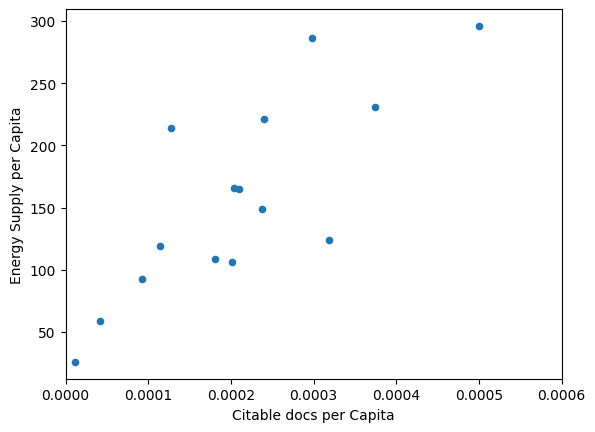

In [478]:
def plot9():
    import matplotlib as plt
    %matplotlib inline

    Top15 = answer_one()
    Top15['PopEst'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
    Top15['Citable docs per Capita'] = Top15['Citable documents'] / Top15['PopEst']
    Top15.plot(x='Citable docs per Capita', y='Energy Supply per Capita', kind='scatter', xlim=[0, 0.0006])
plot9()

## Question 10
Create a new column with a 1 if the country's % Renewable value is at or above the median for all countries in the top 15, and a 0 if the country's % Renewable value is below the median.

*This function should return a series named `HighRenew` whose index is the country name sorted in ascending order of rank.*

In [480]:
top15 = answer_one()
top15['HighRenew'] = top15.apply(lambda x: 1 if x['% Renewable'] >= top15['% Renewable'].median() else 0, axis=1)
top15.sort_values(by='Rank', inplace=True)
top15['HighRenew']

,HighRenew
Country,
China,1
United States,0
Japan,0
United Kingdom,0
Russian Federation,1
Canada,1
Germany,1
India,0
France,1


## Question 11
Use the following dictionary to group the Countries by Continent, then create a DataFrame that displays the sample size (the number of countries in each continent bin), and the sum, mean, and std deviation for the estimated population of each country.

```python
ContinentDict  = {'China':'Asia',
                  'United States':'North America',
                  'Japan':'Asia',
                  'United Kingdom':'Europe',
                  'Russian Federation':'Europe',
                  'Canada':'North America',
                  'Germany':'Europe',
                  'India':'Asia',
                  'France':'Europe',
                  'South Korea':'Asia',
                  'Italy':'Europe',
                  'Spain':'Europe',
                  'Iran':'Asia',
                  'Australia':'Australia',
                  'Brazil':'South America'}
```

*This function should return a DataFrame with index named Continent `['Asia', 'Australia', 'Europe', 'North America', 'South America']` and columns `['size', 'sum', 'mean', 'std']`*

In [256]:
df = answer_one()
ContinentDict  = {'China':'Asia',
                  'United States':'North America',
                  'Japan':'Asia',
                  'United Kingdom':'Europe',
                  'Russian Federation':'Europe',
                  'Canada':'North America',
                  'Germany':'Europe',
                  'India':'Asia',
                  'France':'Europe',
                  'South Korea':'Asia',
                  'Italy':'Europe',
                  'Spain':'Europe',
                  'Iran':'Asia',
                  'Australia':'Australia',
                  'Brazil':'South America'}
df.reset_index(inplace=True)
df['Continent'] = df['Country'].map(ContinentDict)
df['Population Estimate'] = df.apply(lambda x: x['Energy Supply']/x['Energy Supply per Capita'] , axis=1)
df.groupby('Continent')['Population Estimate'].agg(['size', 'sum', 'mean', 'std'])


,size,sum,mean,std
Continent,,,,
Asia,5,2.898666e+09,5.797333e+08,6.790979e+08
Australia,1,2.331602e+07,2.331602e+07,NaN
Europe,6,4.579297e+08,7.632161e+07,3.464767e+07
North America,2,3.528552e+08,1.764276e+08,1.996696e+08
South America,1,2.059153e+08,2.059153e+08,NaN


## Question 12
Cut % Renewable into 5 bins. Group Top15 by the Continent, as well as these new % Renewable bins. How many countries are in each of these groups?

*This function should return a Series with a MultiIndex of `Continent`, then the bins for `% Renewable`. Do not include groups with no countries.*

In [482]:
df=answer_one()

ContinentDict  = {'China':'Asia',
                  'United States':'North America',
                  'Japan':'Asia',
                  'United Kingdom':'Europe',
                  'Russian Federation':'Europe',
                  'Canada':'North America',
                  'Germany':'Europe',
                  'India':'Asia',
                  'France':'Europe',
                  'South Korea':'Asia',
                  'Italy':'Europe',
                  'Spain':'Europe',
                  'Iran':'Asia',
                  'Australia':'Australia',
                  'Brazil':'South America'}
df = df.reset_index()
df['Continent'] = df['Country'].map(ContinentDict)

new_df = df.groupby(['Continent',pd.cut(df['% Renewable'], 5)]).size()
new_df

Continent      % Renewable     
Asia           (2.212, 15.753]     4
               (15.753, 29.227]    1
               (29.227, 42.701]    0
               (42.701, 56.174]    0
               (56.174, 69.648]    0
Australia      (2.212, 15.753]     1
               (15.753, 29.227]    0
               (29.227, 42.701]    0
               (42.701, 56.174]    0
               (56.174, 69.648]    0
Europe         (2.212, 15.753]     1
               (15.753, 29.227]    3
               (29.227, 42.701]    2
               (42.701, 56.174]    0
               (56.174, 69.648]    0
North America  (2.212, 15.753]     1
               (15.753, 29.227]    0
               (29.227, 42.701]    0
               (42.701, 56.174]    0
               (56.174, 69.648]    1
South America  (2.212, 15.753]     0
               (15.753, 29.227]    0
               (29.227, 42.701]    0
               (42.701, 56.174]    0
               (56.174, 69.648]    1
dtype: int64

In [315]:
new_df.apply(lambda x: x if x > 0 else np.nan).dropna()

% Renewable       Continent    
(2.184, 21.351]   Asia             5.0
                  Australia        1.0
                  Europe           4.0
                  North America    1.0
(21.351, 40.422]  Europe           2.0
(59.493, 78.564]  North America    1.0
                  South America    1.0
dtype: float64

## Question 13
Convert the Population Estimate series to a string with thousands separator (using commas). Use all significant digits (do not round the results).

e.g. 12345678.90 -> 12,345,678.90

*This function should return a series `PopEst` whose index is the country name and whose values are the population estimate string*

In [317]:
Energy = pd.read_excel('Introduction_to_Data_Science_Coursera/Week3/exercises/Energy Indicators.xls',
                       skiprows=10, usecols=[2,3,4,5],
                   names=['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable'],
                       skipfooter=38)
Energy.dropna(subset=['Country'], inplace=True)
Energy.replace('...', np.nan, inplace=True)
Energy['Country'].replace(' \(.*\)', '', regex=True, inplace=True)
Energy['Country'].replace('\d+','',regex=True,inplace=True)
Energy['Country'].replace({
        "Republic of Korea": "South Korea",
        "United States of America": "United States",
        "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
        "China, Hong Kong Special Administrative Region": "Hong Kong"
}, inplace=True)

Energy['Energy Supply'] *= 1000000
Energy.set_index('Country', inplace=True)
GDP = pd.read_csv('Introduction_to_Data_Science_Coursera/Week3/exercises/world_bank.csv',skiprows=4, index_col='Country Name')
GDP.rename(index={
    "Korea, Rep.": "South Korea",
    "Iran, Islamic Rep.": "Iran",
    "Hong Kong SAR, China": "Hong Kong"
}, inplace=True)
GDP.index.name = 'Country'
ScimEn = pd.read_excel('Introduction_to_Data_Science_Coursera/Week3/exercises/scimagojr-3.xlsx',index_col='Country')
GDP_subset = GDP.loc[:,'2006':'2015']
df = pd.merge(ScimEn, Energy, how='inner', left_index=True, right_index=True)
df = pd.merge(df, GDP_subset, how='inner', left_index=True, right_index=True)
df['Population Estimate'] = df.apply(lambda x: x['Energy Supply']/x['Energy Supply per Capita'] , axis=1)
df['Population Estimate'] = df['Population Estimate'].apply(lambda x: "{:,}".format(x))
df['Population Estimate']


,Population Estimate
Country,
China,"1,367,645,161.2903225"
United States,"317,615,384.61538464"
Japan,"127,409,395.97315437"
United Kingdom,"63,870,967.741935484"
Russian Federation,"143,500,000.0"
...,...
Maldives,"348,837.20930232556"
Belize,"333,333.3333333333"
Palau,"19,736.842105263157"


This is an example of a visualization that can be created to help understand the data. This is a bubble chart showing % Renewable vs. Rank. The size of the bubble corresponds to the countries' 2014 GDP, and the color corresponds to the continent.


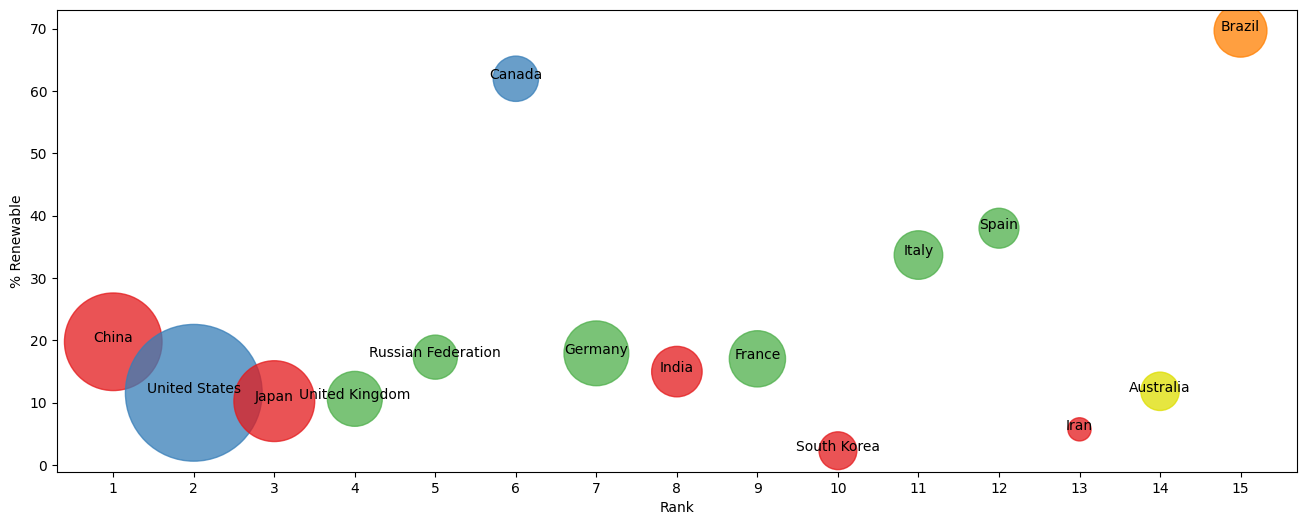

In [326]:
def plot_optional():
    import matplotlib as plt
    %matplotlib inline
    Top15 = answer_one()
    ax = Top15.plot(x='Rank', y='% Renewable', kind='scatter',
                    c=['#e41a1c','#377eb8','#e41a1c','#4daf4a','#4daf4a','#377eb8','#4daf4a','#e41a1c',
                       '#4daf4a','#e41a1c','#4daf4a','#4daf4a','#e41a1c','#dede00','#ff7f00'],
                    xticks=range(1,16), s=6*Top15['2014']/10**10, alpha=.75, figsize=[16,6]);

    for i, txt in enumerate(Top15.index):
        ax.annotate(txt, [Top15['Rank'][i], Top15['% Renewable'][i]], ha='center')

    print("This is an example of a visualization that can be created to help understand the data. \
This is a bubble chart showing % Renewable vs. Rank. The size of the bubble corresponds to the countries' \
2014 GDP, and the color corresponds to the continent.")
plot_optional()